In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = iris.target
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the data
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame (optional)
X = pd.DataFrame(X_scaled, columns=iris.feature_names)

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from itertools import product
from sklearn.model_selection import train_test_split

number_of_clusters = 3
init = 'k-means++'
n_init_values = [10,20,30]
max_iter_values = [50,100,200,300]
tol_values = [1e-3,1e-4,1e-5]
precompute_distances_values = [True,False]
algorithm_values = ['auto','elkan']
split_values = [i/100 for i in range(10,55,5)]

best_model = None
best_score = float('-inf')
best_train_test_ratio = 0.0
best_param_list = []
best_pred_y = 0
best_test_y = 0

# model = KMeans(n_clusters=number_of_clusters, init=init, n_init=5000, max_iter=10000000, tol=1e-7)
# train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=None,test_size=0.25)
# model.fit(train_X,train_y)
# pred_y = model.fit_predict(test_X)
# score = accuracy_score(test_y,pred_y)
# print(score)


for n_init, max_iter, tol,precompute_distances, algorithm, split in product(n_init_values,max_iter_values,tol_values,precompute_distances_values,algorithm_values, split_values):
    train_X, test_X, train_y, test_y = train_test_split(X,y,random_state=None,test_size=split)
    model = KMeans(n_clusters=number_of_clusters, init=init, n_init=n_init, max_iter=max_iter, tol=tol, random_state=None,
                   algorithm=algorithm)
    model.fit(train_X,train_y)
    pred_y = model.fit_predict(test_X)
    score = accuracy_score(test_y,pred_y)

    if score > best_score:
        best_score = score
        best_train_test_ratio = split
        best_model = model
        best_param_list = [n_init, max_iter, tol,precompute_distances, algorithm, split]
        best_pred_y = pred_y
        best_test_y = test_y

In [4]:
print(best_param_list)
print(best_score)
print(best_score)

[10, 50, 0.001, False, 'elkan', 0.15]
1.0
1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23

Confusion Matrix: 

[[9 0 0]
 [0 8 0]
 [0 0 6]]




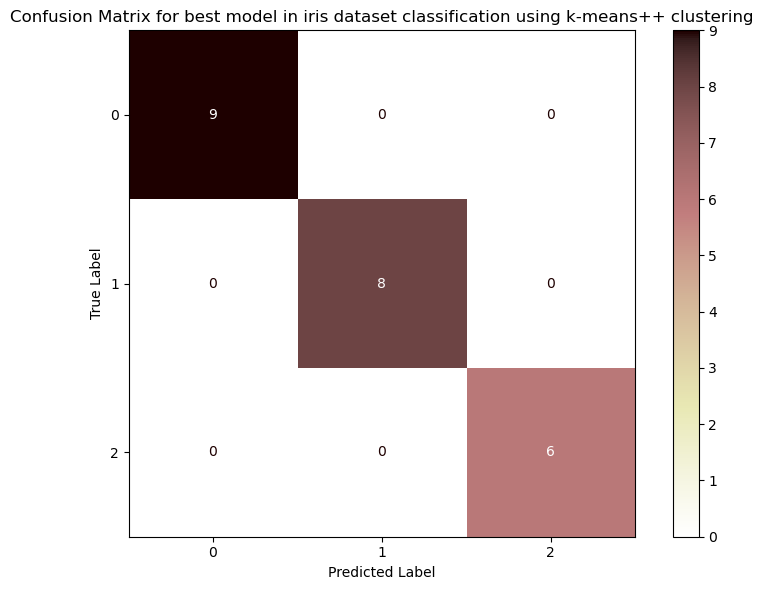

In [6]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(best_test_y, best_pred_y)
print(classification_report(best_test_y,best_pred_y))
print("Confusion Matrix: \n")
print(cm)
print("\n")

fig, ax = plt.subplots(figsize=(8, 6))
cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2]))
cm_display.plot(ax=ax, cmap='pink_r', values_format='d')
  # Add a title and labels
ax.set_title('Confusion Matrix for best model in iris dataset classification using k-means++ clustering')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

plt.tight_layout()
  # Show the Confusion Matrix
plt.show()

In [7]:
from sklearn import metrics

rand_index = metrics.rand_score(best_test_y, best_pred_y)
adjusted_rand_index = metrics.adjusted_rand_score(best_test_y, best_pred_y)

# Mutual Information and Adjusted Mutual Information
mutual_info = metrics.mutual_info_score(best_test_y, best_pred_y)
adjusted_mutual_info = metrics.adjusted_mutual_info_score(best_test_y, best_pred_y)
normalized_mutual_info = metrics.normalized_mutual_info_score(best_test_y, best_pred_y)

# Silhouette Coefficient, Calinski-Harabasz Index, and Davies-Bouldin Index
silhouette_coefficient = metrics.silhouette_score(X, y)
calinski_harabasz_index = metrics.calinski_harabasz_score(X, y)
davies_bouldin_index = metrics.davies_bouldin_score(X, y)

print("Rand Index:", rand_index)
print("Adjusted Rand Index:", adjusted_rand_index)
print("Mutual Information:", mutual_info)
print("Adjusted Mutual Information:", adjusted_mutual_info)
print("Normalized Mutual Information:", normalized_mutual_info)
print("Silhouette Coefficient:", silhouette_coefficient)
print("Calinski-Harabasz Index:", calinski_harabasz_index)
print("Davies-Bouldin Index:", davies_bouldin_index)

Rand Index: 1.0
Adjusted Rand Index: 1.0
Mutual Information: 1.08501115745815
Adjusted Mutual Information: 1.0
Normalized Mutual Information: 1.0
Silhouette Coefficient: 0.3811261580543803
Calinski-Harabasz Index: 191.30360862698998
Davies-Bouldin Index: 1.067257040548008
